<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/burn_severity/PostFire_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAR & NDVI Regeneration Post-Fire**

*Post-Fire comparison of NDVI and SAR*


Google Earth Engine code of NDVI time series in SAR burn severity classes:

https://code.earthengine.google.com/3cd7192ff416104830bfa1267431be04

* can print time series, but times out with too much data
* can instead export to Google Drive a csv of the time series
* currently these are assets on GEE, that can be used for the time series.
  * UAVSAR severity classes: projects/wetlands-366023/assets/uavsar_severity
  * UAVSAR & dNBR agreement classes: uavsar_dnbr_agreement
  * UAVSAR & dNBR disagreement classes: disagree_sar_dnbr
  * BAER severity classes: projects/wetlands-366023/assets/BAER_severity
  * MTBS severity classes: projects/wetlands-366023/assets/MTBS_severity


To Do:
- add value spread bars to time series charts (redo csv's to output stddev or quantiles)
- label classes
- CalVeg

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
columns_to_read = ['NDVI', 'VALUE', 'date']

# CSV file path in Google Drive
baer_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/monthly_ndvi_composite_baer_severity_classes.csv'
baer_df = pd.read_csv(baer_path, usecols=columns_to_read)

mtbs_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/monthly_ndvi_composite_mtbs_severity_classes.csv'
mtbs_df = pd.read_csv(mtbs_path, usecols=columns_to_read)

uavsar_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/monthly_ndvi_composite_uavsar_severity_classes.csv'
uavsar_df = pd.read_csv(uavsar_path, usecols=columns_to_read)

dnbr_uavsar_agree_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/monthly_ndvi_composite_uavsar_dnbr_agree.csv'
dnbr_uavsar_agree_df = pd.read_csv(dnbr_uavsar_agree_path, usecols=columns_to_read)

dnbr_uavsar_disagree_path = '/content/drive/MyDrive/UAVSAR_Science/LaTuna_Fire/Scripts/monthly_ndvi_composite_uavsar_dnbr_disagree.csv'
dnbr_uavsar_disagree_df = pd.read_csv(dnbr_uavsar_disagree_path, usecols=columns_to_read)

dnbr_uavsar_disagree_df

,NDVI,VALUE,date
0,0.220386,10.0,2017-01-01T00:00:00
1,0.269517,60.0,2017-01-01T00:00:00
2,0.189464,40.0,2017-01-01T00:00:00
3,0.255724,30.0,2017-01-01T00:00:00
4,0.400429,10.0,2017-02-01T00:00:00
...,...,...,...
179,0.256817,30.0,2020-09-26T00:00:00
180,0.239211,10.0,2020-10-27T00:00:00
181,0.255795,60.0,2020-10-27T00:00:00
182,0.232448,40.0,2020-10-27T00:00:00


In [107]:
## Can generate interactive version of the charts below

import plotly.graph_objs as go

df = uavsar_df

# Convert colors to hex format
hex_colors = ['#%02x%02x%02x' % tuple(int(255 * c) for c in color[:3]) for color in colors]

# Create traces for each series
traces = []
for value, hex_color in zip(unique_values, hex_colors):
    trace = go.Scatter(x=df[df['VALUE'] == value]['date'], y=df[df['VALUE'] == value]['NDVI'], mode='lines+markers', name=f'VALUE={value}', line=dict(color=hex_color))
    traces.append(trace)

# Add vertical line for La Tuna Fire
la_tuna_fire_line = go.Scatter(x=[pd.to_datetime('2017-09-09'), pd.to_datetime('2017-09-09')],
                               y=[df['NDVI'].min(), df['NDVI'].max()],
                               mode='lines',
                               name='La Tuna Fire: September 9, 2017',
                               line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title='Monthly NDVI in UAVSAR-defined Severity Classes',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='NDVI Value'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# Plot
fig = go.Figure(data=traces + [la_tuna_fire_line], layout=layout)
fig.show()


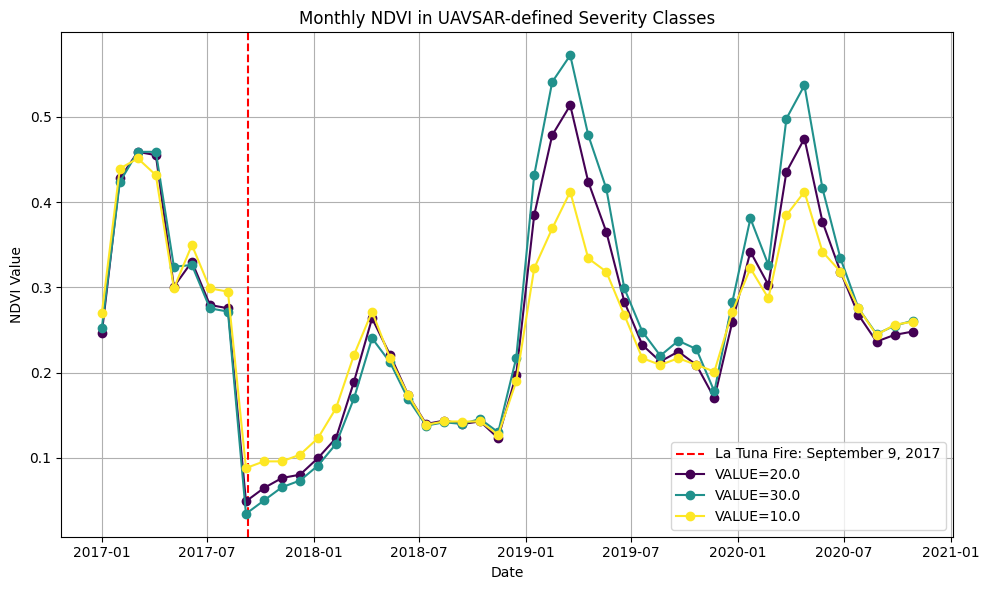

In [105]:
df = uavsar_df
df['date'] = pd.to_datetime(df['date'])

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(10, 6))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')
for value, color in zip(unique_values, colors):
    plt.plot(df[df['VALUE'] == value]['date'], df[df['VALUE'] == value]['NDVI'], marker='o', linestyle='-', color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in UAVSAR-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

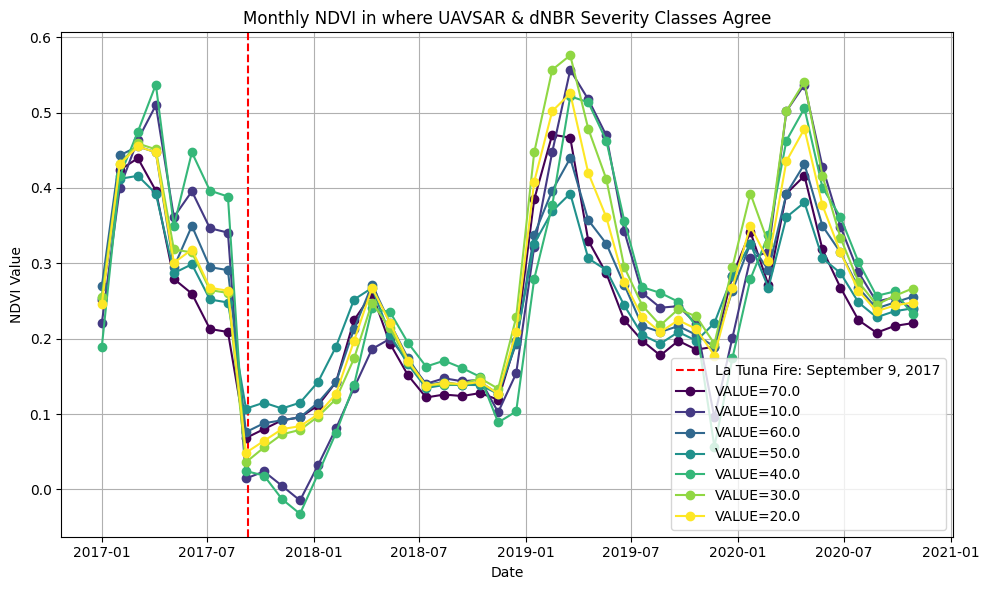

In [98]:
df = dnbr_uavsar_agree_df
df['date'] = pd.to_datetime(df['date'])

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(10, 6))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')
for value, color in zip(unique_values, colors):
    plt.plot(df[df['VALUE'] == value]['date'], df[df['VALUE'] == value]['NDVI'], marker='o', linestyle='-', color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in where UAVSAR & dNBR Severity Classes Agree')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

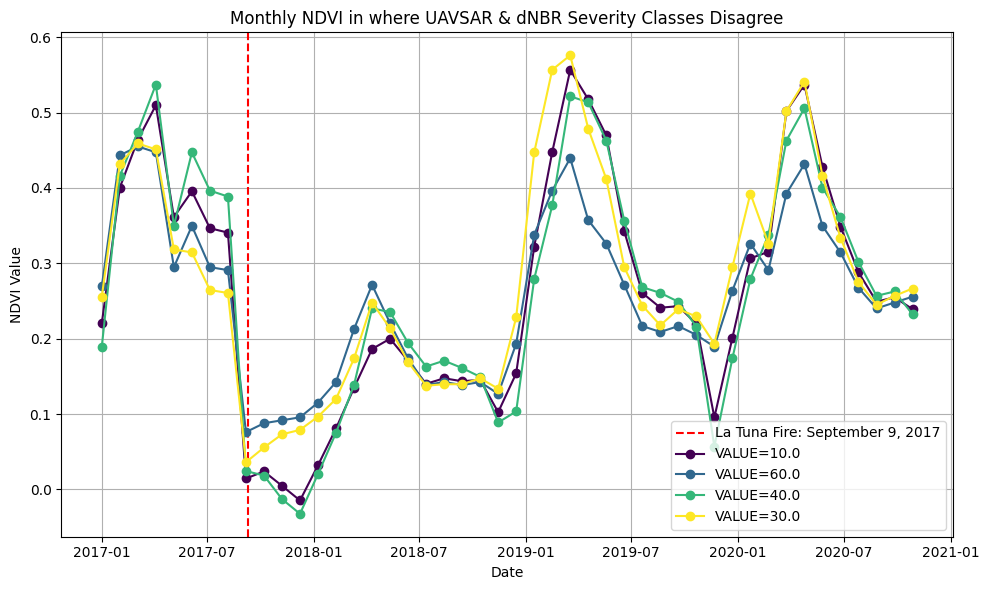

In [99]:
df = dnbr_uavsar_disagree_df
df['date'] = pd.to_datetime(df['date'])

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(10, 6))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')
for value, color in zip(unique_values, colors):
    plt.plot(df[df['VALUE'] == value]['date'], df[df['VALUE'] == value]['NDVI'], marker='o', linestyle='-', color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in where UAVSAR & dNBR Severity Classes Disagree')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

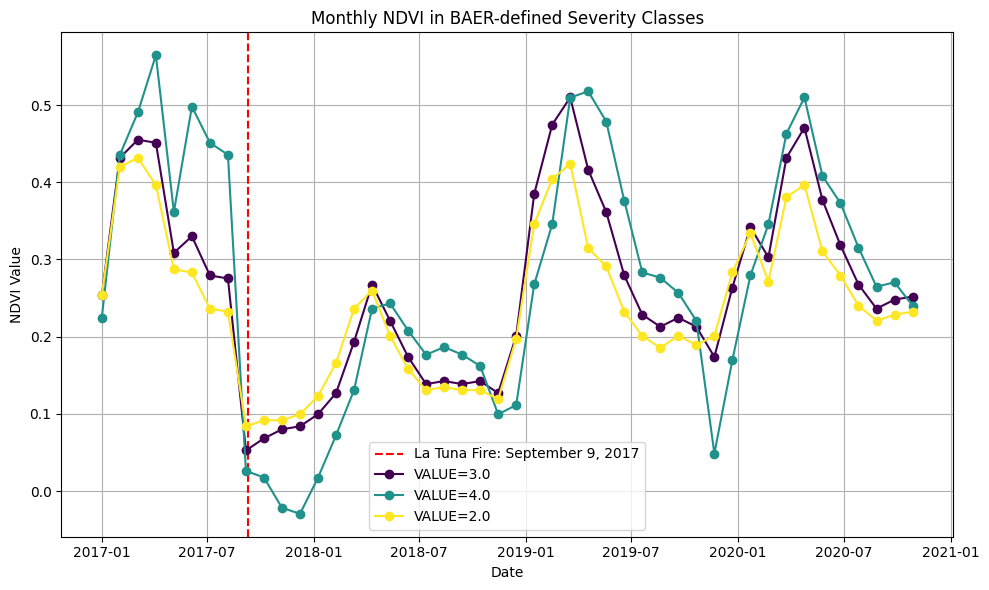

In [100]:
df = baer_df
df['date'] = pd.to_datetime(df['date'])

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(10, 6))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')
for value, color in zip(unique_values, colors):
    plt.plot(df[df['VALUE'] == value]['date'], df[df['VALUE'] == value]['NDVI'], marker='o', linestyle='-', color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in BAER-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

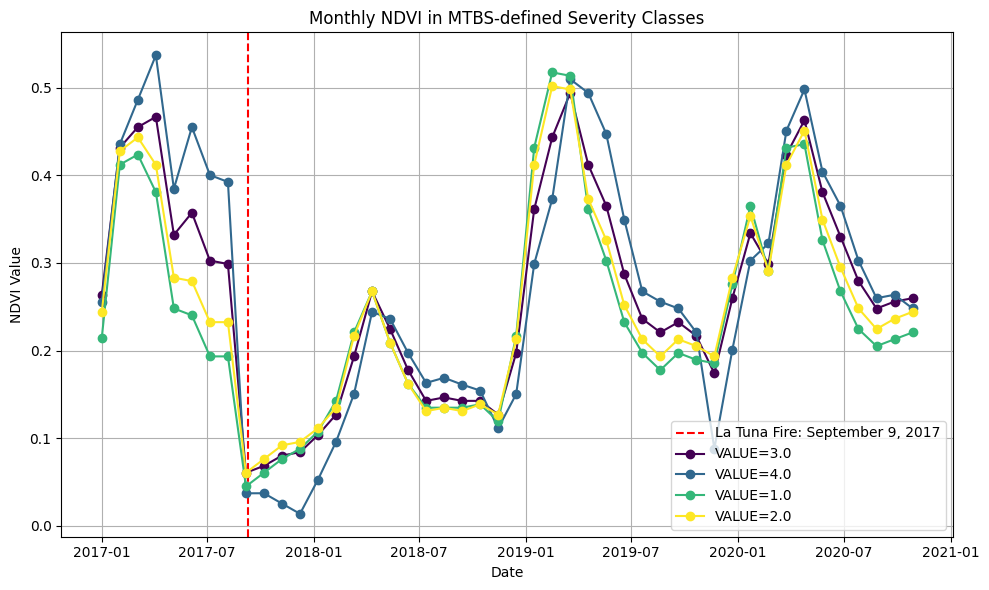

In [101]:
df = mtbs_df
df['date'] = pd.to_datetime(df['date'])

# Get unique values in the 'VALUE' column
unique_values = df['VALUE'].unique()

# Define colors for each unique value
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))

# Plot all series on the same plot with different colors
plt.figure(figsize=(10, 6))
plt.axvline(pd.to_datetime('2017-09-09'), color='red', linestyle='--', label='La Tuna Fire: September 9, 2017')
for value, color in zip(unique_values, colors):
    plt.plot(df[df['VALUE'] == value]['date'], df[df['VALUE'] == value]['NDVI'], marker='o', linestyle='-', color=color, label=f'VALUE={value}')

plt.title('Monthly NDVI in MTBS-defined Severity Classes')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()